In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(i, j, ax):
    path = f"/media/daniel/data1/sentinel2/Wallonia_for_SatlasSR/test/sentinel_images/image_{i}_{j}.tif"
    img = tifffile.imread(path)
    img = img.transpose(2,1,0)
    img = img / 10000

    ax.imshow(img)

def show_series(i):
    fig, axs = plt.subplots(1, 6, figsize=(15, 5))
    for j in range(6):
        show_img(i, j, axs[j])

    plt.show()

def show_multiple_series(N):
    fig, axs = plt.subplots(N, 6, figsize=(15, 3*N))
    for i in range(N):
        for j in range(6):
            show_img(i, j, axs[i][j])
    
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

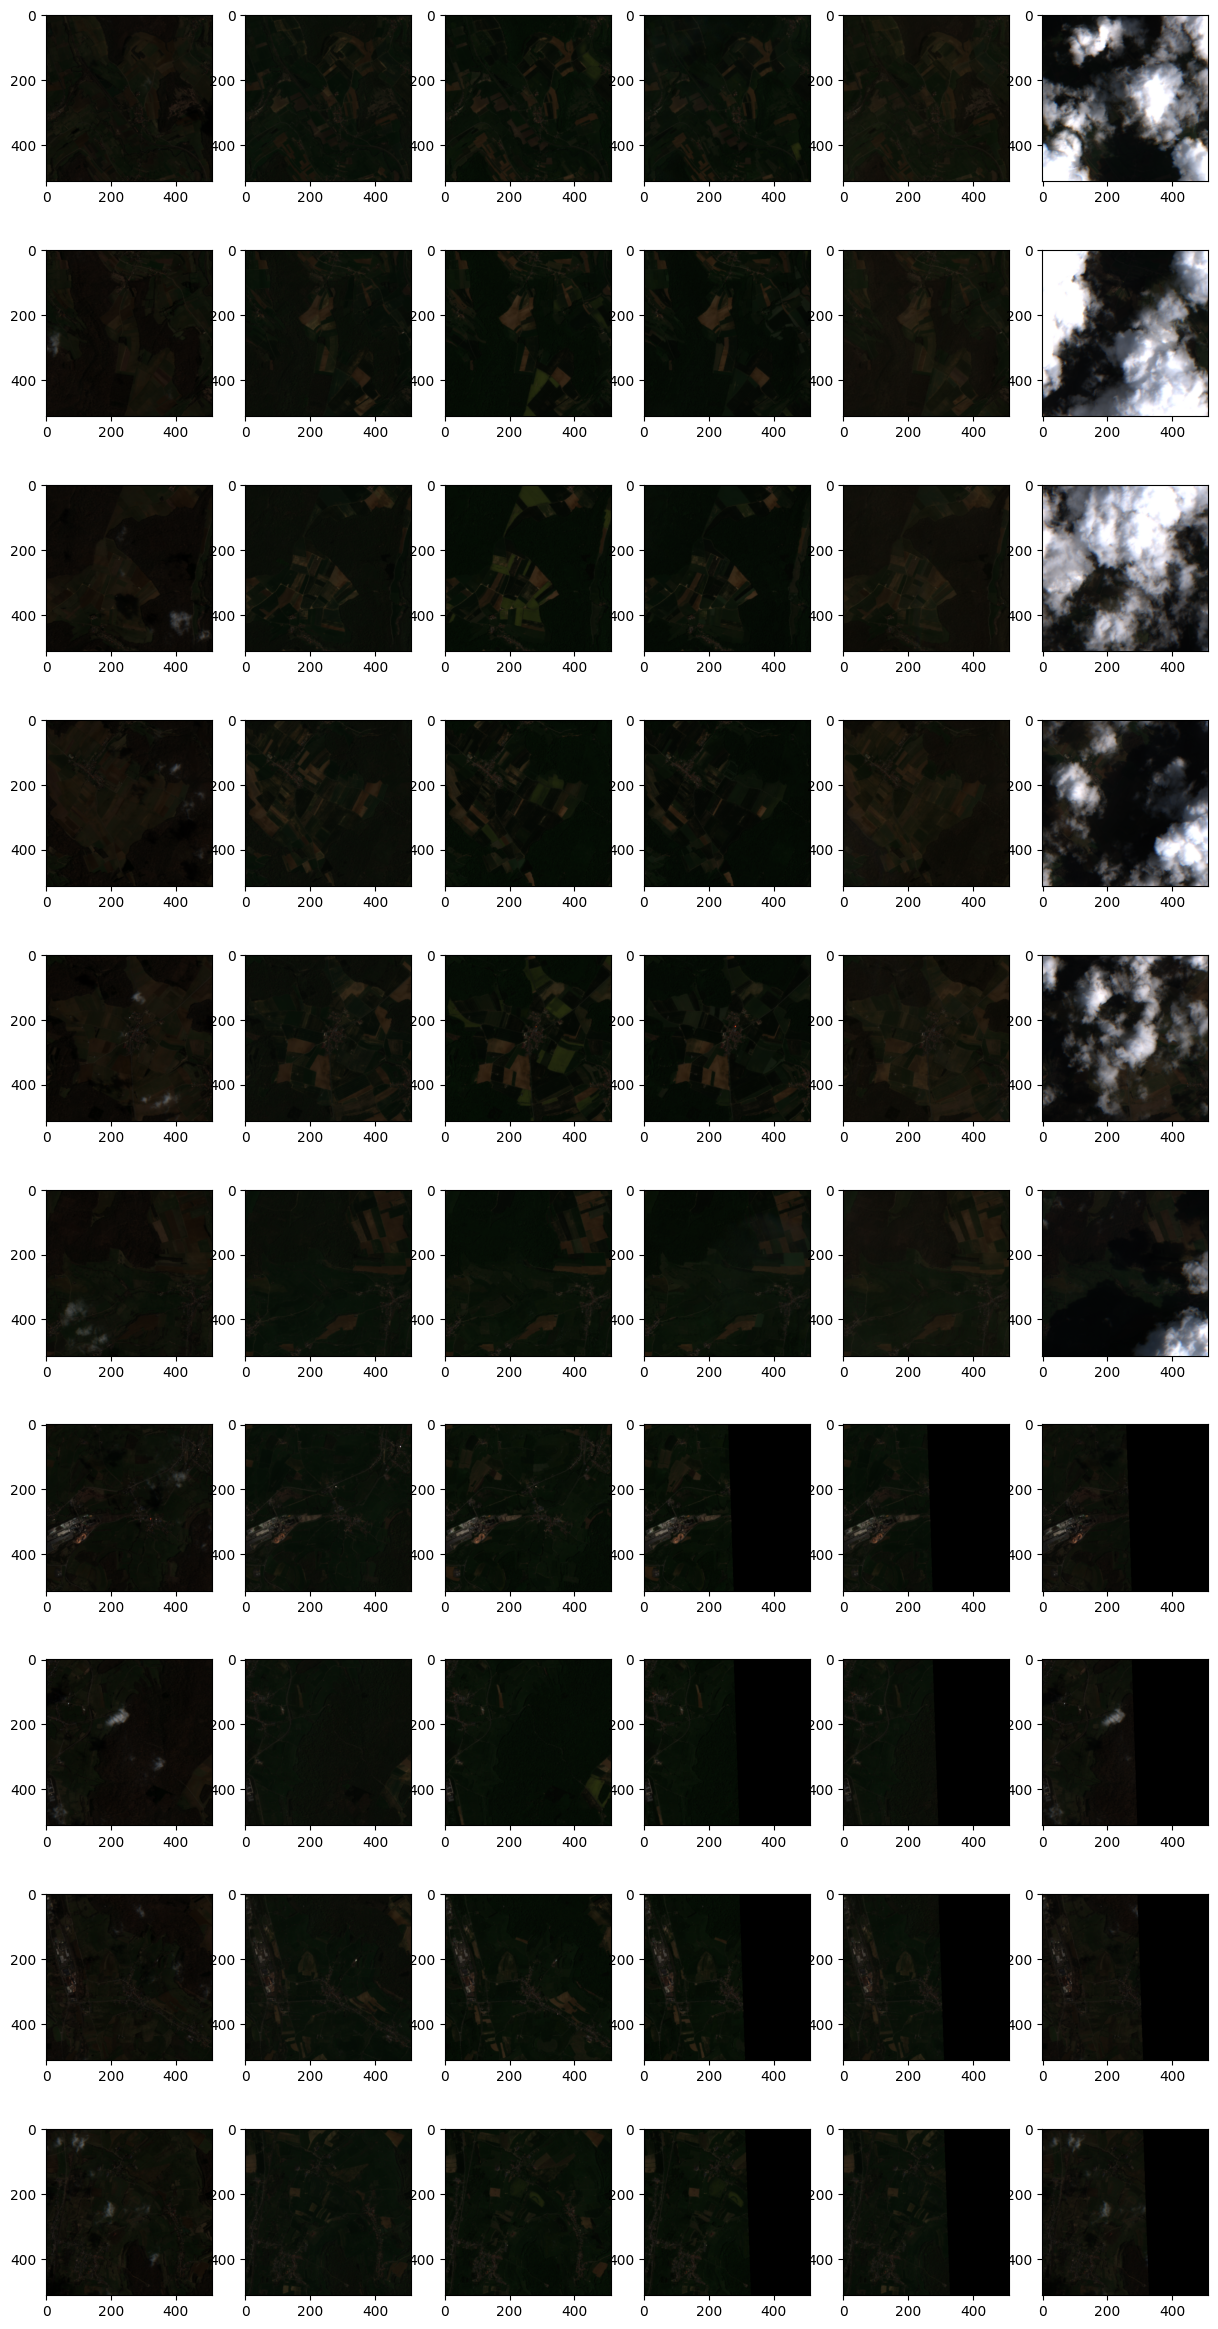

In [24]:
show_multiple_series(10)

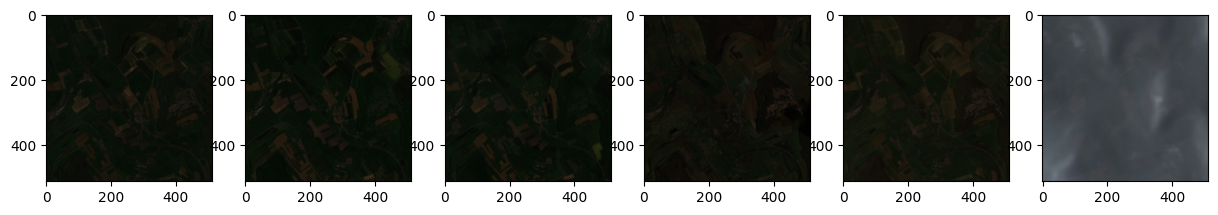

In [3]:
show_series(0)

In [2]:
import matplotlib.pyplot as plt

In [9]:

path = f"/media/daniel/data1/sentinel2/Wallonia_for_SatlasSR/test/sentinel_images/image_{1}_{0}.tif"
img = tifffile.imread(path)

img = img.transpose(2,1,0) / 10_000 

plt.imsave("test.png", img)

In [14]:
img2 = plt.imread("test.png")
print(img2.shape)
print(np.max(img2))
print(np.min(img2))

(512, 512, 4)
1.0
0.007843138


In [3]:
import ee

In [4]:
ee.Initialize()

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_doiqkQG3NJ1t8IS?source=API


In [6]:
import json
geo_json_path = "/home/daniel/Downloads/belgium-statistical-districts.json"

with open(geo_json_path, 'r') as f:
    geo_json = json.load(f)

In [13]:
geo_json[0].keys()

dict_keys(['geo_point_2d', 'geo_shape', 'objectid_1', 'objectid', 'cs012011', 'nis_012011', 'sec012011', 'cs102001', 'cs031991', 'cs031981', 'sector_nl', 'sector_fr', 'gemeente', 'commune', 'arrond_nl', 'arrond_fr', 'prov_nl', 'prov_fr', 'reg_nl', 'reg_fr', 'nuts1', 'nuts2', 'nuts3_new', 'inhab', 'gis_perime', 'inh_km2', 'gis_area_h', 'cad_area_h', 'shape_leng', 'shape_area', 'codesecteu', 'cd_refnis', 'cd_sector', 'total', 'males', 'females', 'group0_14', 'group15_64', 'group65etp', 'areaofdis'])

In [25]:
geo_json[0]['geo_shape']['geometry']['coordinates']

[[[[5.735237100279579, 49.71488619757563],
   [5.73578138458468, 49.71468685925893],
   [5.735807291679347, 49.71469051174502],
   [5.736104157987273, 49.71451102984275],
   [5.736514286375293, 49.714263065309034],
   [5.736956070811179, 49.71401266489679],
   [5.736966495057116, 49.714003204618464],
   [5.736481046657395, 49.713703029222295],
   [5.735452532301224, 49.71317895136851],
   [5.734757935395589, 49.71283809634928],
   [5.73393731628411, 49.71242336313462],
   [5.73320585988351, 49.712034922659114],
   [5.73261757628436, 49.71171323170386],
   [5.731821643323666, 49.71128902132498],
   [5.731079738244997, 49.71090525947988],
   [5.730419300382711, 49.71053646991229],
   [5.730030287030236, 49.7103568654979],
   [5.729396563485543, 49.71007405590619],
   [5.728622129017259, 49.70977991819811],
   [5.728216123048672, 49.7096502825875],
   [5.727675218746417, 49.709492671571795],
   [5.727208904484357, 49.709352366993215],
   [5.726679198160382, 49.70921516727993],
   [5.72677

In [17]:
wallonie_json = list(filter(lambda x: x['reg_fr'] == 'Région Wallonne', geo_json))

In [33]:
all_coords = []

In [37]:
features = []
for x in wallonie_json:
    try:
        all_coords.append(x['geo_shape']['geometry']['coordinates'])
        features.append(x['geo_shape']['geometry'])
    except:
        print(x)


{'geo_point_2d': None, 'geo_shape': None, 'objectid_1': '11580', 'objectid': '11582', 'cs012011': '56016C09-', 'nis_012011': '56016.00000000000', 'sec012011': 'C09-', 'cs102001': '56016C09-', 'cs031991': '56016C09-', 'cs031981': '56016C09-', 'sector_nl': 'NEUF-MAISONS', 'sector_fr': 'NEUF-MAISONS', 'gemeente': 'CHIMAY', 'commune': 'CHIMAY', 'arrond_nl': 'Thuin', 'arrond_fr': 'Thuin', 'prov_nl': 'Henegouwen', 'prov_fr': 'Hainaut', 'reg_nl': 'Waals Gewest', 'reg_fr': 'Région Wallonne', 'nuts1': 'BE3', 'nuts2': 'BE32', 'nuts3_new': 'BE326', 'inhab': 50, 'gis_perime': 10200.44259, 'inh_km2': 17.47, 'gis_area_h': 288.18338, 'cad_area_h': 286.126701, 'shape_leng': 10200.6792898, 'shape_area': 2882003.05157, 'codesecteu': '56016C09-', 'cd_refnis': '56016', 'cd_sector': 'C09-', 'total': 49.0, 'males': 32.0, 'females': 17.0, 'group0_14': 14.0, 'group15_64': 35.0, 'group65etp': 0.0, 'areaofdis': 'BE'}
{'geo_point_2d': None, 'geo_shape': None, 'objectid_1': '17394', 'objectid': '17396', 'cs012011

In [38]:
# multipolygon = ee.Geometry.MultiPolygon(all_coords)
feature_collection = ee.FeatureCollection(features)

In [39]:
roi = feature_collection.geometry()

In [40]:
roi.getInfo()

In [1]:
import ee
ee.Authenticate()


Successfully saved authorization token.
